In [1]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import math
from scipy import integrate
from scipy.integrate import quad
from scipy.integrate import trapz
from sympy import symbols, solve
import scipy.special as spc
import pandas as pd
from scipy import interpolate

In [2]:
#Problem 1

Re=6.371e+6

def CircEqn(r):
    return np.abs(2*np.pi*(Re*np.sin(r/Re)-r))-5

r = fsolve(CircEqn, 25)
r[0]

57869.90854793362

In [3]:
#Problem 2

c=2.99792458e+8 #m
G=6.6743e-11 #m+3 kg-1 s-2
rho=2.7e-27 #kg m-3

Ro=c/np.sqrt(4*np.pi*G*rho)
print(Ro*3.24078e-23)


time=2*np.pi*Ro/c
print(time/3.1536e+16)

6456.253540260794
132.39865873465848


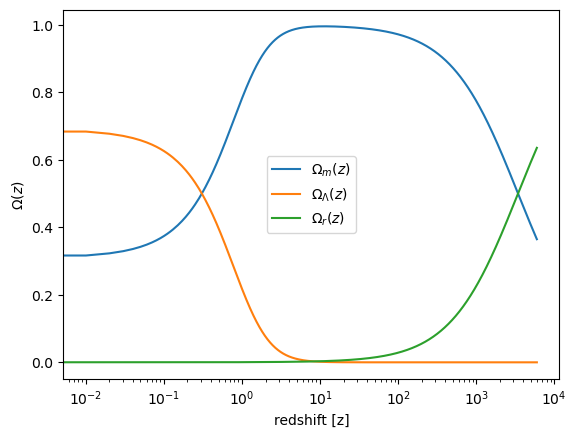

In [4]:
#Problem 3

OmegaMo=0.31
OmegaDEo=0.69
OmegaRo=9e-5

def EpsilonM(z):
    return OmegaMo*(1+z)**3

def EpsilonDE(z):
    return OmegaDEo

def EpsilonR(z):
    return OmegaRo*(1+z)**4

def EpsilonC(z):
    return EpsilonM(z) + EpsilonDE(z) + EpsilonR(z)


def OmegaM(z):
    return EpsilonM(z)/EpsilonC(z)

def OmegaDE(z):
    return EpsilonDE(z)/EpsilonC(z)

def OmegaR(z):
    return EpsilonR(z)/EpsilonC(z)


Bounds = np.arange(0,6000, 0.01)

plt.plot(Bounds, OmegaM(Bounds), label="$\Omega_m(z)$")
plt.plot(Bounds, OmegaDE(Bounds), label="$\Omega_\Lambda(z)$")
plt.plot(Bounds, OmegaR(Bounds), label="$\Omega_r(z)$")
plt.xscale("log")
plt.xlabel("redshift [z]")
plt.ylabel("$\Omega(z)$")
plt.legend(loc='center')

In [5]:
def OmegaMDE(z):
    return OmegaM(z)-OmegaDE(z)

zMDE = fsolve(OmegaMDE, 1)
zMDE[0]

0.3056570927117689

In [6]:
def OmegaMR(z):
    return OmegaM(z)-OmegaR(z)

zMR = fsolve(OmegaMR, 100)
zMR[0]

3443.4444444444443

In [7]:
OmegaMo=0.31
OmegaDEo=0.69
OmegaRo=9e-5
Omegao=OmegaMo+OmegaDEo+OmegaRo
OmegaKo=1-OmegaMo-OmegaDEo
angularsize=np.pi/129600

HubbleCons= 68 #km s-1 Mpc-1
Hubble= HubbleCons/3.086e+19 #s-1
Dh=2.99792458e+5/HubbleCons #Mpc

def tdif(a):
    return 1/(Hubble*(OmegaRo*a**(-2)+OmegaMo*a**(-1)+OmegaDEo*a**(2)+(1-Omegao))**(1/2))

def codif(z):
    return Dh/((OmegaRo*(1+z)**(4)+OmegaMo*(1+z)**(3)+OmegaDEo+OmegaKo*(1+z)**(2))**(1/2))

redshift1=4.25
abound1=(1+redshift1)**(-1)
redshift2=1
abound2=(1+redshift2)**(-1)

In [8]:
time1, time1err = quad(tdif,0,abound1)
print("time after Big Bang in years:",time1/(60*60*24*365e+9),"billion years")

comoving1, comoving1err = quad(codif,0,redshift1)
print("comoving distance at redshift:", comoving1, "Mpc")

dl1=comoving1*(1+redshift1)
print("luminosity distance at redshift:", dl1, "Mpc")

da1=comoving1/(1+redshift1)
print("angular diameter distance at redshift:", da1, "Mpc")

diameter1=da1*angularsize
print("physical diameter at redshift:", diameter1, "Mpc")

time after Big Bang in years: 1.4256954605085874 billion years
comoving distance at redshift: 7471.984557748514 Mpc
luminosity distance at redshift: 39227.9189281797 Mpc
angular diameter distance at redshift: 1423.2351538568598 Mpc
physical diameter at redshift: 0.03450019370129205 Mpc


In [9]:
time2, time2err = quad(tdif,0,abound2)
print("time after Big Bang in years:",time2/(60*60*24*365e+9), "billion years")

comoving2, comoving2err = quad(codif,0,redshift2)
print("comoving distance at redshift:", comoving2, "Mpc")

dl2=comoving2*(1+redshift2)
print("luminosity distance at redshift:", dl2, "Mpc")

da2=comoving2/(1+redshift2)
print("angular diameter distance at redshift:", da2, "Mpc")

diameter2=da2*angularsize
print("physical diameter at redshift:", diameter2, "Mpc")

time after Big Bang in years: 5.835340398042405 billion years
comoving distance at redshift: 3380.635980606001 Mpc
luminosity distance at redshift: 6761.271961212002 Mpc
angular diameter distance at redshift: 1690.3179903030004 Mpc
physical diameter at redshift: 0.040974464356223525 Mpc


In [10]:
print(Dh)

4408.712617647058


In [11]:
print(abound2)

0.5


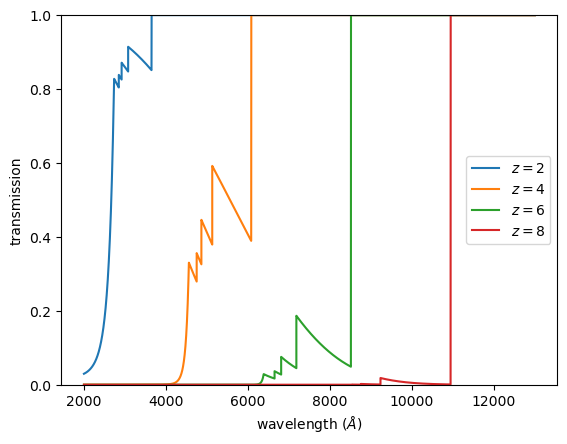

In [113]:
l_a=1216 #Angstroms
c_a=0.0036

l_b=1026 #Angstroms
c_b=1.7e-3

l_g=973 #Angstroms
c_g=1.2e-3

l_d=950 #Angstroms
c_d=9.3e-4

l_ho=912 #Angstroms

def teff_alpha2(l,z=2):
    return c_a*(l/(l_a))**(3.46)*np.where(l < l_a*(1+z),1,0)

def teff_beta2(l,z=2):
    return c_b*(l/(l_b))**(3.46)*np.where(l < l_b*(1+z),1,0)

def teff_gamma2(l,z=2):
    return c_g*(l/(l_g))**(3.46)*np.where(l < l_g*(1+z),1,0)

def teff_delta2(l,z=2):
    return c_d*(l/(l_d))**(3.46)*np.where(l < l_d*(1+z),1,0)

def teff_ho2(l,z=2):
    return (0.25*(l/(l_ho))**(3)*((1+z)**(0.46)-(l/l_ho)**(0.46))+9.4*(l/(l_ho))**(1.5)*((1+z)**(0.18)-(l/l_ho)**(0.18))-0.7*(l/(l_ho))**(3)*((1+z)**(-1.32)-(l/l_ho)**(-1.32))-0.023*((1+z)**(1.68)-(l/l_ho)**(1.68)))*np.where(l < l_ho*(1+z),1,0)

def transmission2(l):
    return np.exp(-(teff_alpha2(l) + teff_beta2(l) + teff_gamma2(l) + teff_delta2(l) + teff_ho2(l)))


def teff_alpha4(l,z=4):
    return c_a*(l/(l_a))**(3.46)*np.where(l < l_a*(1+z),1,0)

def teff_beta4(l,z=4):
    return c_b*(l/(l_b))**(3.46)*np.where(l < l_b*(1+z),1,0)

def teff_gamma4(l,z=4):
    return c_g*(l/(l_g))**(3.46)*np.where(l < l_g*(1+z),1,0)

def teff_delta4(l,z=4):
    return c_d*(l/(l_d))**(3.46)*np.where(l < l_d*(1+z),1,0)

def teff_ho4(l,z=4):
    return (0.25*(l/(l_ho))**(3)*((1+z)**(0.46)-(l/l_ho)**(0.46))+9.4*(l/(l_ho))**(1.5)*((1+z)**(0.18)-(l/l_ho)**(0.18))-0.7*(l/(l_ho))**(3)*((1+z)**(-1.32)-(l/l_ho)**(-1.32))-0.023*((1+z)**(1.68)-(l/l_ho)**(1.68)))*np.where(l < l_ho*(1+z),1,0)

def transmission4(l):
    return np.exp(-(teff_alpha4(l) + teff_beta4(l) + teff_gamma4(l) + teff_delta4(l) + teff_ho4(l)))


def teff_alpha6(l,z=6):
    return c_a*(l/(l_a))**(3.46)*np.where(l < l_a*(1+z),1,0)

def teff_beta6(l,z=6):
    return c_b*(l/(l_b))**(3.46)*np.where(l < l_b*(1+z),1,0)

def teff_gamma6(l,z=6):
    return c_g*(l/(l_g))**(3.46)*np.where(l < l_g*(1+z),1,0)

def teff_delta6(l,z=6):
    return c_d*(l/(l_d))**(3.46)*np.where(l < l_d*(1+z),1,0)

def teff_ho6(l,z=6):
    return (0.25*(l/(l_ho))**(3)*((1+z)**(0.46)-(l/l_ho)**(0.46))+9.4*(l/(l_ho))**(1.5)*((1+z)**(0.18)-(l/l_ho)**(0.18))-0.7*(l/(l_ho))**(3)*((1+z)**(-1.32)-(l/l_ho)**(-1.32))-0.023*((1+z)**(1.68)-(l/l_ho)**(1.68)))*np.where(l < l_ho*(1+z),1,0)

def transmission6(l):
    return np.exp(-(teff_alpha6(l) + teff_beta6(l) + teff_gamma6(l) + teff_delta6(l) + teff_ho6(l)))


def teff_alpha8(l,z=8):
    return c_a*(l/(l_a))**(3.46)*np.where(l < l_a*(1+z),1,0)

def teff_beta8(l,z=8):
    return c_b*(l/(l_b))**(3.46)*np.where(l < l_b*(1+z),1,0)

def teff_gamma8(l,z=8):
    return c_g*(l/(l_g))**(3.46)*np.where(l < l_g*(1+z),1,0)

def teff_delta8(l,z=8):
    return c_d*(l/(l_d))**(3.46)*np.where(l < l_d*(1+z),1,0)

def teff_ho8(l,z=8):
    return (0.25*(l/(l_ho))**(3)*((1+z)**(0.46)-(l/l_ho)**(0.46))+9.4*(l/(l_ho))**(1.5)*((1+z)**(0.18)-(l/l_ho)**(0.18))-0.7*(l/(l_ho))**(3)*((1+z)**(-1.32)-(l/l_ho)**(-1.32))-0.023*((1+z)**(1.68)-(l/l_ho)**(1.68)))*np.where(l < l_ho*(1+z),1,0)

def transmission8(l):
    return np.exp(-(teff_alpha8(l) + teff_beta8(l) + teff_gamma8(l) + teff_delta8(l) + teff_ho8(l)))

Bounds_Ang = np.arange(2000,13000, 0.01)

plt.plot(Bounds_Ang, transmission2(Bounds_Ang), label="$z=2$")
plt.plot(Bounds_Ang, transmission4(Bounds_Ang), label="$z=4$")
plt.plot(Bounds_Ang, transmission6(Bounds_Ang), label="$z=6$")
plt.plot(Bounds_Ang, transmission8(Bounds_Ang), label="$z=8$")

plt.ylim(0,1)
plt.ylabel("transmission")
plt.xlabel("wavelength ($\AA$)")
plt.legend(loc='right')